## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Functions import * ## imports all functions stored in a .py file
from Initialize import * ## contains initial values

## in Initialize.py ask if the net flux values initally given sum to 0 to ensure a steady state solution

4 Box Net flux is 0
9 Box Net flux is 0


Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

## 4 box model results, CO2 in air and ocean with 2 integration methods, RK4 and odeint

In [2]:
## Solveing the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.odeint(MassFlux_forced, M0_4, t) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.odeint(MassFlux_steady, M0_4, t)
# RK4
[trk, Mrk] = rk4(MassFlux_forced, t_start, t_end, M0_4, 1000) 
[trkss, Mrkss] = rk4(MassFlux_steady, t_start, t_end, M0_4, 1000) 
Mrk_real = np.real(Mrk) ## Take the real values only (I doubt there)
Mrkss_real = np.real(Mrkss) ## Take the real values only (I doubt there)


TypeError: MassFlux_forced() missing 1 required positional argument: 'a'

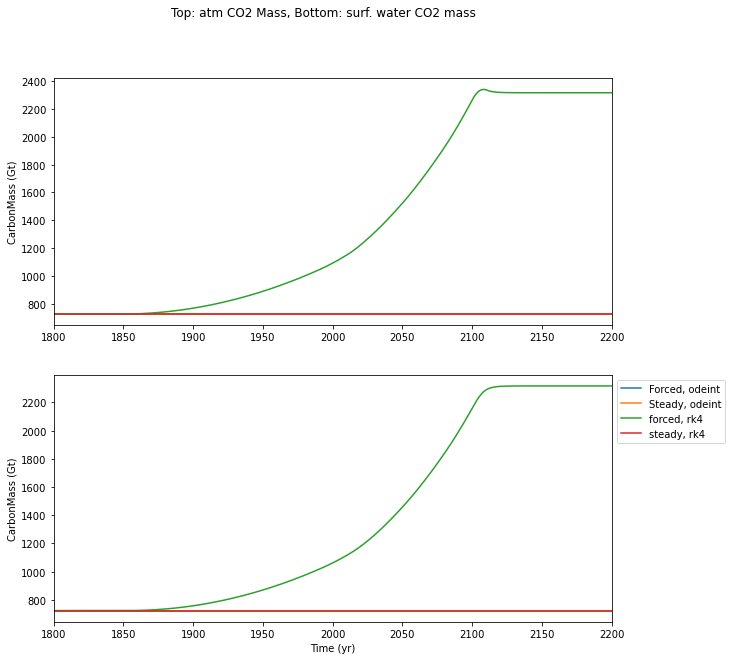

In [6]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(t, Mforced[:, box_num], label = 'Forced, odeint')
    plt.plot(t, Msteady[:, box_num], label = 'Steady, odeint')
    plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("CarbonMass (Gt)")
    plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

4 box model with 0 emissions at 2110. Emissions cause inc in CO2 in both boxes but once stopped a new steady state is reached. This makes sense (math) because only emissions were added, need more sinks/added sinking mechanism to draw out CO2 from atmosphere. 

## 9 Box Model 
Use RK45, RK23 and DOP853 methods of integration and compare

In [4]:
#del Mforced, Msteady, Mrk_real, Mrkss_real 
t = (1800, 2200)
t_start = 1500; t_end= 2200; n = 1000 # TODO want 1800-2200 time interval
#t = np.linspace(t_start, t_end, n) # some time span
## Solveing the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, max_step=20, args=(1, 1)) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, max_step=20, args=(0, 0))


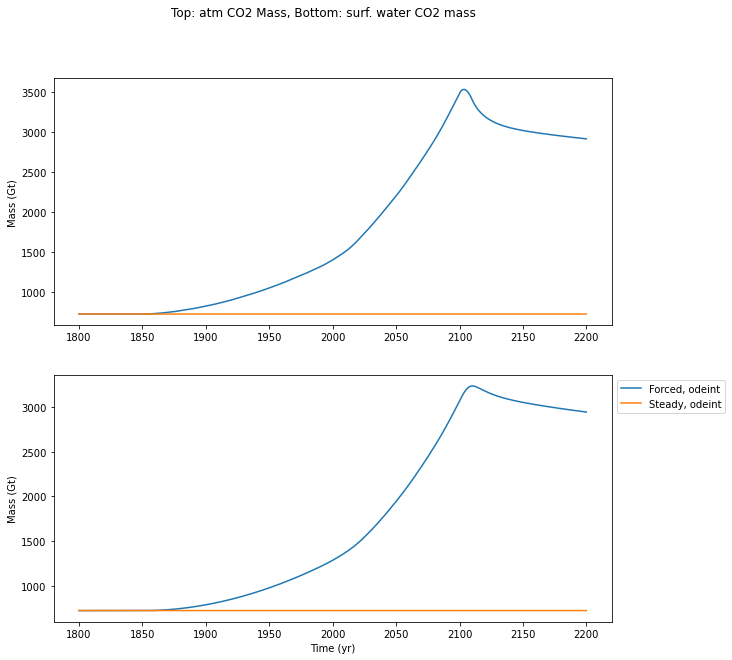

In [6]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(Mforced.t, Mforced.y[box_num, :], label = 'Forced, odeint')
    plt.plot(Msteady.t, Msteady.y[box_num, :], label = 'Steady, odeint')
    #plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    #plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("Mass (Gt)")
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [18]:
#del Mforced, Msteady, Mrk_real, Mrkss_real 
t = (1800, 2200) # T-span
time_step = 1e-2

## Solving the coupled ODEs with different ODE methods using the emissions forcing
MRK45 = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, max_step=time_step, args=(1, 1)) ## t first bc Mass flux function needs t first for rk4 func.
MRK23 = sci.solve_ivp(MassFlux, t, M0_9, method="RK23", vectorized = True, max_step=time_step, args=(1, 1))
MDOP853 = sci.solve_ivp(MassFlux, t, M0_9, method="DOP853", vectorized = True, max_step=time_step, args=(1, 1))


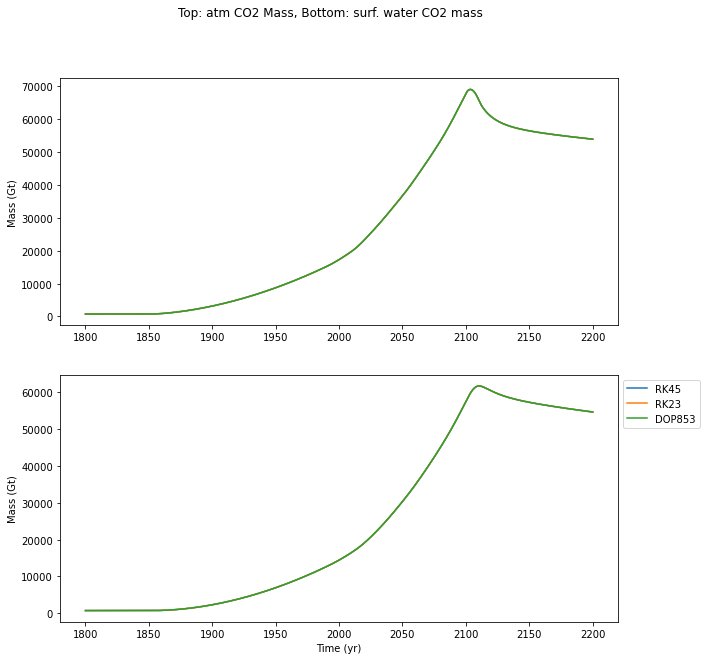

In [19]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(MRK45.t, MRK45.y[box_num, :], label = 'RK45')
    plt.plot(MRK23.t, MRK23.y[box_num, :], label = 'RK23')
    plt.plot(MDOP853.t, MDOP853.y[box_num, :], label = 'DOP853')
    plt.ylabel("Mass (Gt)")
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()